In [1]:
from pymongo import MongoClient
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML

/Users/estebanquintanillaiii/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
db = mongo['AlzheimersDB']

In [4]:
Questions = db['Question_Data']

In [5]:
data = list(Questions.find({"LocationDesc": "Texas"}, {"_id": 0}))

AlzDB_df = pd.DataFrame(data)

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

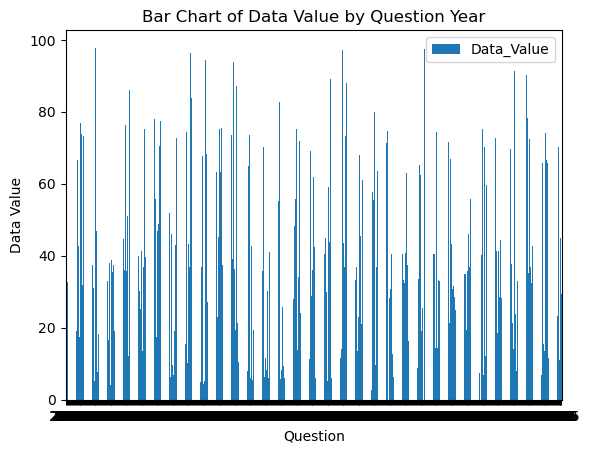

<Figure size 640x480 with 0 Axes>

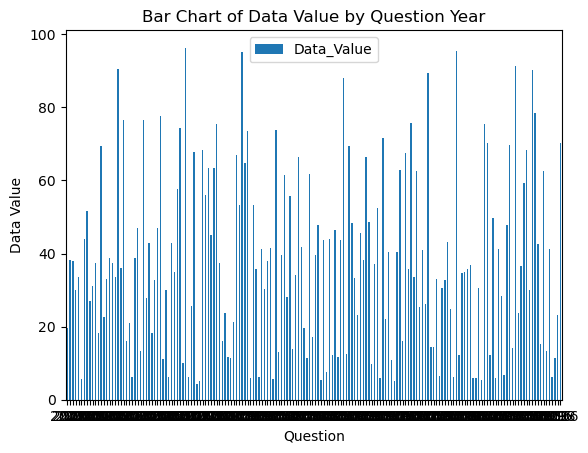

<Figure size 640x480 with 0 Axes>

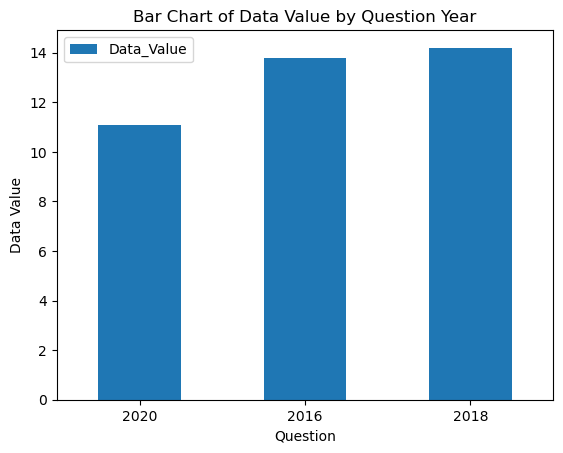

<Figure size 640x480 with 0 Axes>

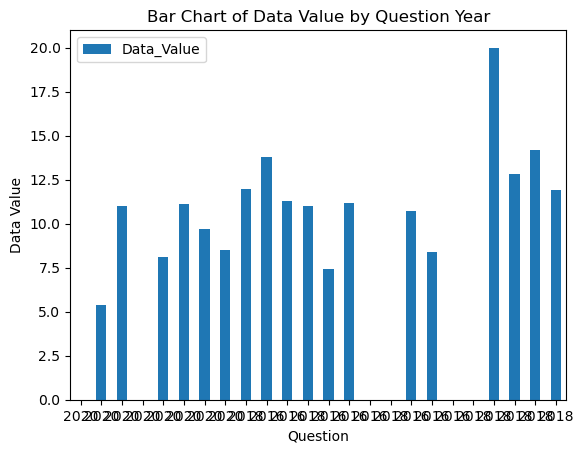

<Figure size 640x480 with 0 Axes>

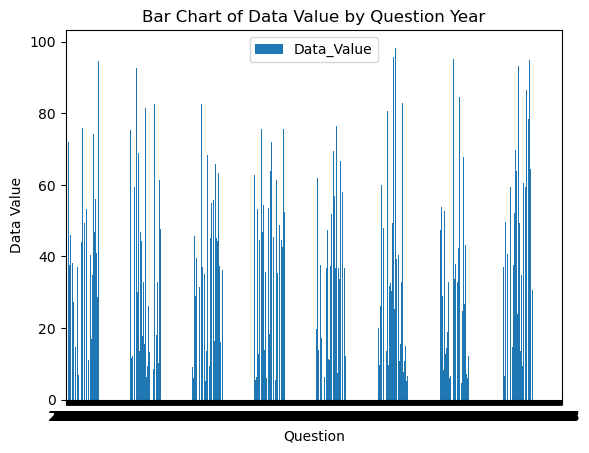

<Figure size 640x480 with 0 Axes>

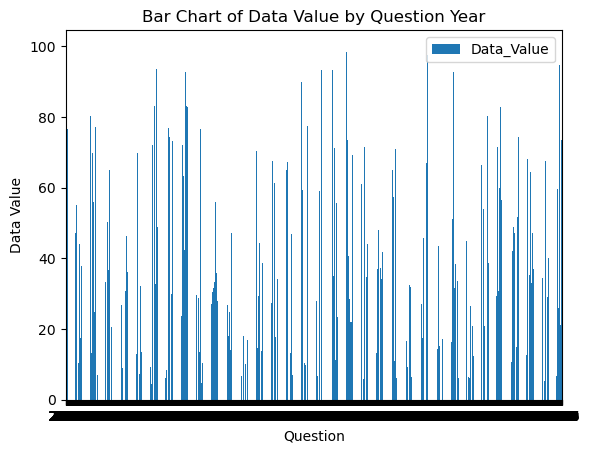

<Figure size 640x480 with 0 Axes>

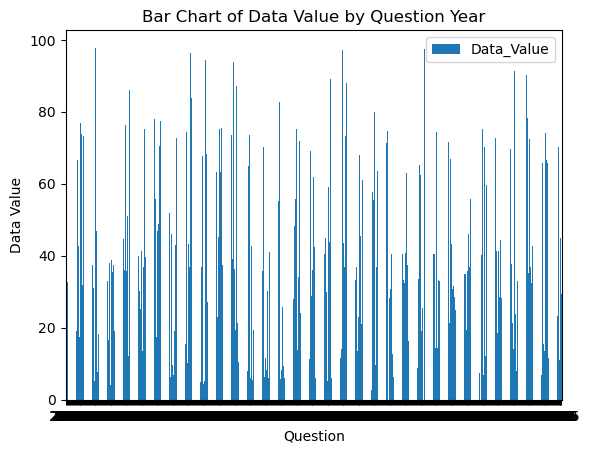

<Figure size 640x480 with 0 Axes>

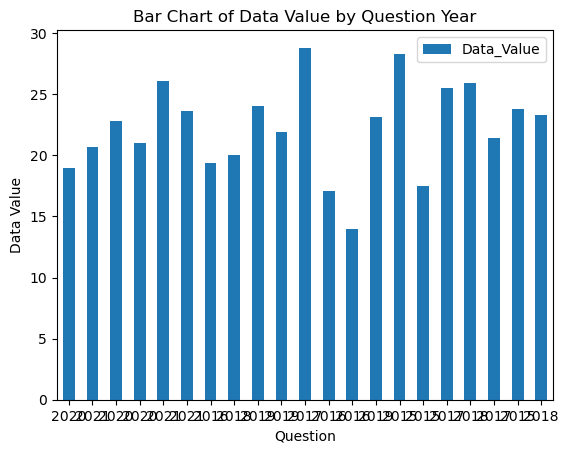

<Figure size 640x480 with 0 Axes>

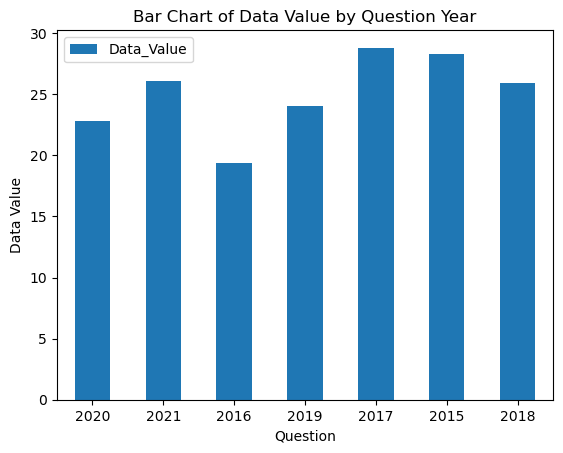

<Figure size 640x480 with 0 Axes>

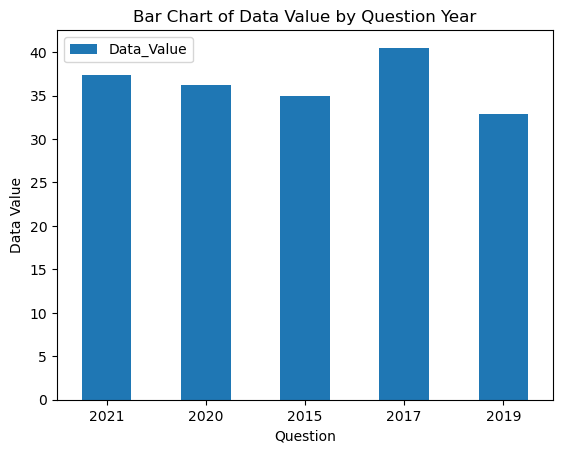

<Figure size 640x480 with 0 Axes>

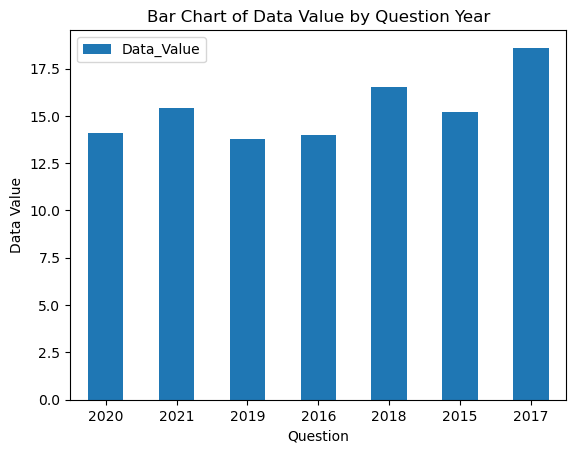

<Figure size 640x480 with 0 Axes>

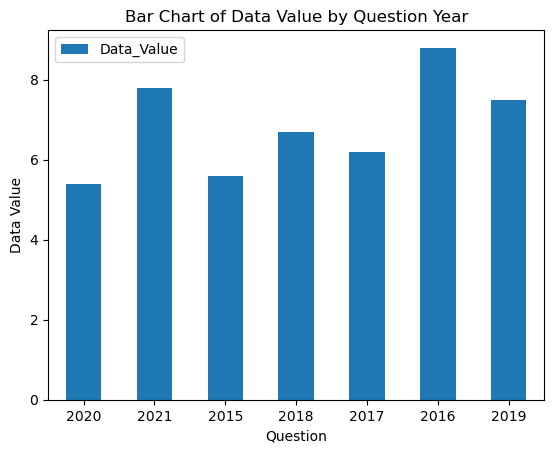

<Figure size 640x480 with 0 Axes>

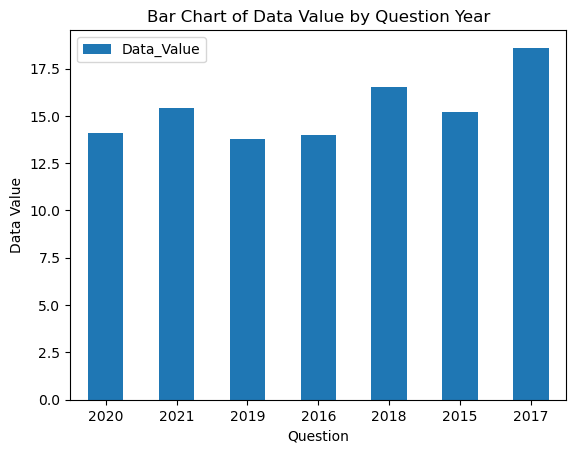

<Figure size 640x480 with 0 Axes>

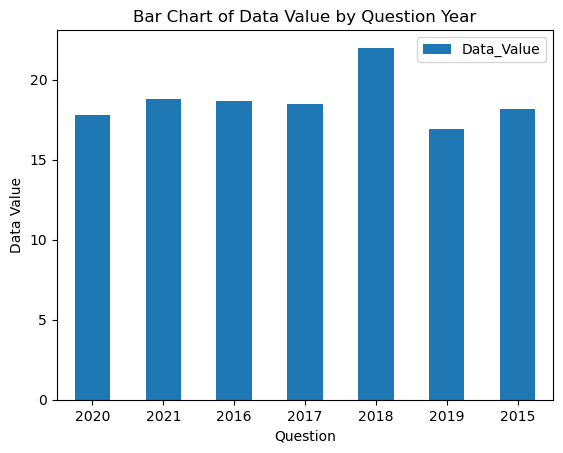

<Figure size 640x480 with 0 Axes>

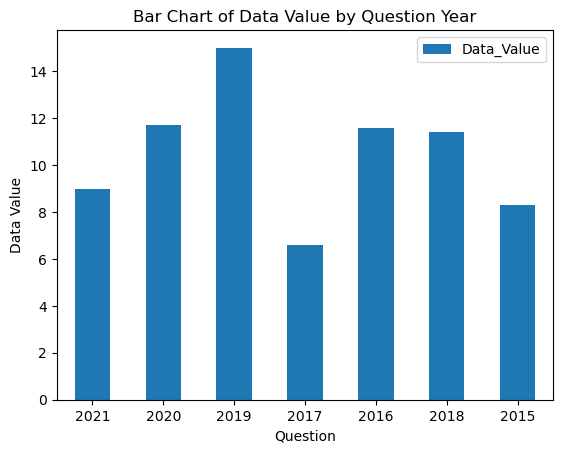

<Figure size 640x480 with 0 Axes>

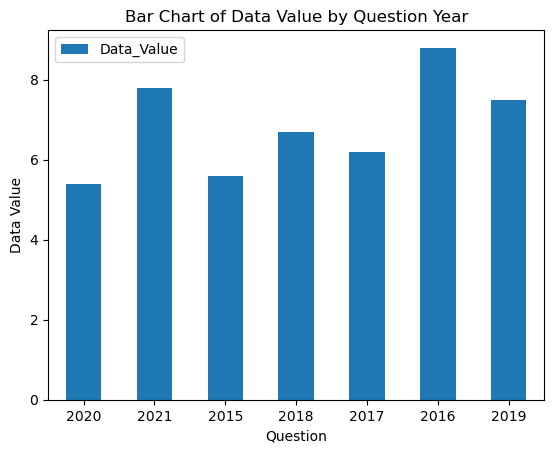

<Figure size 640x480 with 0 Axes>

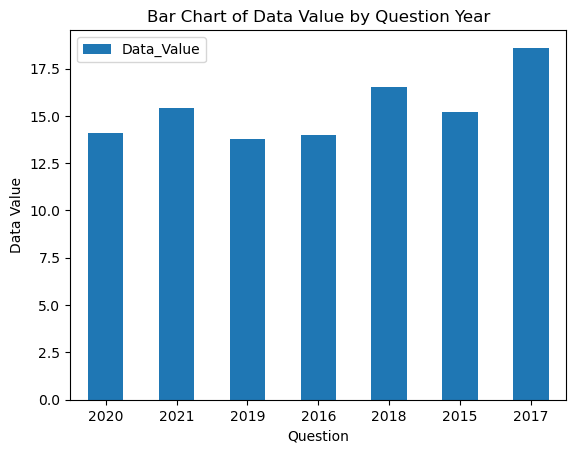

<Figure size 640x480 with 0 Axes>

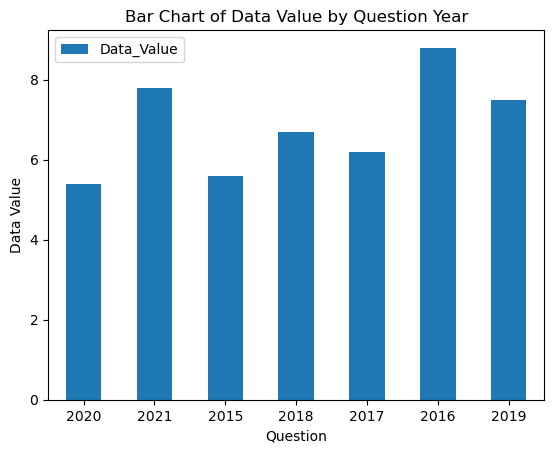

In [6]:

# Create dropdown widgets
question_dropdown = widgets.Dropdown(
    options=['All'] + list(AlzDB_df['Question'].unique()),
    value='All',
    description='Select Question:'
)

stratification_dropdown = widgets.Dropdown(
    options=['All'] + list(AlzDB_df['Gender or Race/Ethnicity'].unique()),
    value='All',
    description='Select Gender or Race/Ethnicity:'
)

age_group_dropdown = widgets.Dropdown(
    options=['All'] + list(AlzDB_df['Age Group'].unique()),  
    value='All',
    description='Select Age Group:'
)

# Create matplotlib figure and axes
plt.figure(figsize=(8, 6))

# Define update_data function
def update_data(change):
    question = question_dropdown.value
    stratification = stratification_dropdown.value
    age_group = age_group_dropdown.value
    
    filtered_data = AlzDB_df
    if question != 'All':
        filtered_data = filtered_data[filtered_data['Question'] == question]
    if stratification != 'All':
        filtered_data = filtered_data[filtered_data['Gender or Race/Ethnicity'] == stratification]
    if age_group != 'All':
        filtered_data = filtered_data[filtered_data['Age Group'] == age_group]
    
    # Clear previous plot
    plt.clf()

     # Plot new bar chart
    if not filtered_data.empty:
        filtered_data.plot(kind='bar', x='Year', y='Data_Value', rot=0)
        plt.xlabel('Question')
        plt.ylabel('Data Value')
        plt.title('Bar Chart of Data Value by Question Year')
        plt.show()
    
    # Display filtered data in HTML table
        with output:
            output.clear_output()
            display_data(filtered_data)

    else:
        print("No data available for the selected filters.")



# Observe dropdown changes
question_dropdown.observe(update_data, names='value')
stratification_dropdown.observe(update_data, names='value')
age_group_dropdown.observe(update_data, names='value')

# Create an output widget
output = widgets.Output()

# Display widgets
display(widgets.VBox([question_dropdown, stratification_dropdown, age_group_dropdown, output]))

# Function to display data as HTML table
def display_data(data):
    display(HTML(data.to_html(index=False)))